In [67]:
#!/usr/bin/env python3

import pandas as pd
import seaborn as sns

In [68]:
r25_path = "..//data//route25_potential_and_real_stops.csv"
ridership = "..//data//Stop_Riders_Ranking_by_Route_Daily_Totals_May_2019.csv"
demos_path = "..//data//DemoByStops.csv"

In [69]:
r25_stop_ids = pd.read_csv(r25_path, usecols=['Est_TotPop_Density','CorrespondingStopID', 'Transfer'])
r25_stop_ids.dropna(inplace=True)
r25_stop_ids.rename(columns={'CorrespondingStopID': 'StopId'})

,Est_TotPop_Density,Transfer,StopId
0,7456.09,Yes,58.0
4,7619.07,Yes,675.0
11,6172.67,Yes,907.0
16,3906.30,Yes,1795.0
17,3116.89,No,1796.0
24,2673.80,No,1797.0
27,2556.67,No,3808.0
38,2098.30,No,3645.0
51,1395.47,No,229.0
63,1578.82,No,2114.0


In [70]:
ridership_data = pd.read_csv(ridership,thousands=',', usecols=['UNIQUE_STOP_NUMBER', 'TOTAL', 'IndividRoute'])
#ridership_data = ridership_data[ridership_data['IndividRoute'] == 25]
ridership_data.rename(columns={'UNIQUE_STOP_NUMBER' : 'StopId'}, inplace=True)
ridership_data

,StopId,TOTAL,IndividRoute
0,1,144,4
1,1,88,5
2,1,14,9
3,1,1,42
4,2,228,4
...,...,...,...
3469,4027,1,303
3470,4028,0,303
3471,4029,0,303
3472,4033,2,33


In [71]:
demo_data = pd.read_csv(demos_path, usecols=['StopId','Routes', 'TotalPop'])
demo_data

,StopId,Routes,TotalPop
0,3273,104,2060
1,3972,104,1088
2,2720,104,1088
3,2740,104,2060
4,3984,104,2060
...,...,...,...
8925,30,13,923
8926,43,31,996
8927,28,13,1202
8928,828,"13, 31",1202


In [72]:
#final_data = pd.merge(r25_stop_ids, ridership_data, on='CorrespondingStopID', how='inner')
final_data = pd.merge(demo_data, ridership_data, on='StopId')

final_data['TOTAL'] = final_data['TOTAL'].astype(int)

In [73]:
final_data

,StopId,Routes,TotalPop,TOTAL,IndividRoute
0,3273,104,2060,8,104
1,3273,104,1088,8,104
2,3273,104,3229,8,104
3,3273,104,2273,8,104
4,3972,104,1088,1,104
...,...,...,...,...,...
13641,1534,11,936,0,11
13642,686,31,996,0,31
13643,823,31,996,0,31
13644,53,31,996,11,31


In [74]:
# This is really informal, but basically a noticed that there are 
# a few stops with over a thousand riders, all on beach lines
# and I suspect we can safely exculde those
final_data = final_data[final_data['TOTAL'] <= 1000]
    

In [75]:
def is_not_transfer_stop(row):
    routes = row['Routes'].split(',')
    return len(routes) == 1

mask = final_data.apply(is_not_transfer_stop, axis=1)

non_transfer = final_data[mask]
#non_transfer = final_data[final_data['Transfer'] == 'No']

non_transfer

,StopId,Routes,TotalPop,TOTAL,IndividRoute
0,3273,104,2060,8,104
1,3273,104,1088,8,104
2,3273,104,3229,8,104
3,3273,104,2273,8,104
4,3972,104,1088,1,104
...,...,...,...,...,...
13641,1534,11,936,0,11
13642,686,31,996,0,31
13643,823,31,996,0,31
13644,53,31,996,11,31


[Text(0, 0.5, 'Total Ridership by Stop'), Text(0.5, 0, 'Total Population')]

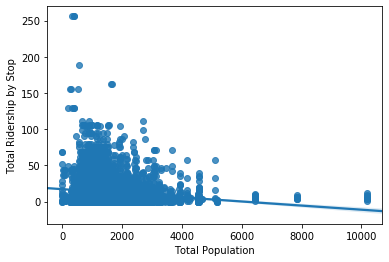

In [80]:
plt = sns.regplot(x=non_transfer['TotalPop'], y=non_transfer['TOTAL'])
plt.set(xlabel='Total Population', ylabel='Total Ridership by Stop')

[Text(0, 0.5, 'Total Ridership by Stop'), Text(0.5, 0, 'Population Density')]

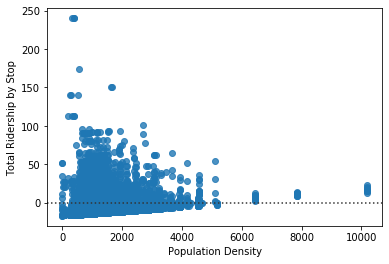

In [78]:
vice_plt = sns.residplot(x=non_transfer['TotalPop'], y=non_transfer['TOTAL'])
vice_plt.set(xlabel='Total Population', ylabel='Total Ridership by Stop')

In [ ]:
fig = plt.get_figure()
fig.savefig('..//plots//linear_pop_v_util_no_transfer.png')